# DataCamp Project

# **Suicide Numbers Prediction**

Authors:

Abouda Khmayes

Beltaief Nader

Gherissi Wissam

Zadem Mehdi

This starting kit requires the following dependencies:



*   sklearn
*   pandas
*   numpy
*   matplotlib
*   seaborn

You can install all requisite modules with pip install -r requirements.txt

In addition, ramp-workflow is needed. This can be installed from the master branch on GitHub:

python -m pip install https://api.github.com/repos/paris-saclay-cds/ramp-workflow/zipball/master

# General Outline

1. Introduction

2. Exploratory Data Analysis

3. Workflow

4. Local testing before submission

#1- Introduction

Since the 1900s, sociologists have been studying the intriguing phenomenon of suicide. Multiple studies have been published concerning this subject. Each study uses different features trying to understand the major causes of suicide. In our case, we want to conduct a statistical study of this happenening introducing some indicators that may have influence over the evolution of suicide rates over the years. Innovation in machine learning and deep learning may allow us to have a deeper insight about suicide numbers per country or per generation in order to put in devise strategies that target the categories of people more likely to commit suicide.

** **
##1-1 Data Description
The featured dataset presents a statistical study of suicide numbers for countries over the world, crossed by many relevant socio-economic and life satifsaction indicators. The data was collected from five different sources.

- **1-Suicide rates from 1986 to 2016** 
A basic historical (1985-2016) suicide data. Each row of this dataset contains the suicide number by country, by year, by sex and by demographic group. The dataset also includes each country's Gross Domestic Product (GDP) by year.
The features that we extracdet from this dataset are : 
>>>> - **sex** : a categorical feature with two possible values "male" and "female".
>>>> - **age** :  a categorical feature representing five different demographic groups, age intervals.
>>>> - **country** : the name of country. 
>>>> - **year** : a numerical feature representing the years.
>>>> - **generation** : the name of the generation. 
>>>> - **population** : the population for said country.
>>>> - **GDP_for_year** : a numerical feature describing each country's Gross Domestic Product (GDP) by year.
>>>> - **GDP_per_capita** : a numerical feature.
>>>> - **suicide_no** : a numerical feature : suicide number by country, year and demographic group. The aim of the challenge is the prediction of this variable.

- **2-World Development Indicators**
In order to have a better understanding of the suicides numbers we decided to add other relevant socio-economic indicators. Thus we exctracted from the "World Development Indicators" datasets, published by the World Bank on Kaggle, the following features :
>>>> - **Urban Population** : Total number of individuals living in urban areas in each country by year.
>>>> - **Rural Population** : Total number of individuals living in rural areas in each country by year.
>>>> - **GNI current (\\$)** : Gross National Income of each country by year measured in (\\$). 
>>>> - **Unemployment** : The total number of unemployed individuals.
>>>> - **Healthy life expenctency** : Healthy life expectency at birth in years. 
>>>> - **Inflation** : Inflation by country and year. This feature can be considered as a GDP and GNI deflator. 
>>>> - **Population growth, annual** : The pourcentage of the annual population growth. 

- **3-World Happiness Report**
We extrated also other features from the World Happiness Report which is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be.  This report is produced by the United Nations Sustainable Development Solutions Network in partnership with the Ernesto Illy Foundation.

The features that we extracted from the data published within the report are : 
>>>> - **Life Ladder** : It also called Happiness Index; it is a float $\in [0,10]$ describing the satisfaction of individuals in each country with their life. 
>>>> - **Social Support** : The national average of the binary responses to the question “If you were in trouble, do you have relatives or friends you can count on to help youwhenever you need them, or not?”

>>>> - **Freedom to make life choices** : The national average of responses to the GWPquestion “Are you satisfied or dissatisfied with your freedom to choose what to do with your life?”
 
 - **4-Human Development Index (HDI)**
 This is a dataset that can be found here. It represents each country's Human Development Index between 1980-2014. We extrated from this dataset one feature which we called also Human Development Index (HDI).

- **5-Child Labour (all)**
This is a dataset that can be found here. It represents the percentage of children that are labourer in each country. The child labour might be correlated to the suicide of children. That's why We extrated from this dataset one feature which we called Child Labour.


##1-2 KPI and metric
The aim of this project is mainly to build a robust model to provide a prediction for suicide numbers given different key features and diveded per age group and country. The usefulness of this work derives from the urgency that suicide poses as a social phenomenon.

* Such a model would provide for each country an estimate of how high suicide rates can be per age group. This allows for preventive measures to be taken to address the issue.

* The extensive features collected in this dataset would allow for more flexibility for the model: by varying the values for the features, one can conceive a clear policy targeting the aspects that would be optimal in reducing death toll by suicide.

To elaborate more, if a country for example has the possibility of either reducing unemployment or increase social support, the model should be able to predict which of these decisions would be more efficient in reducing suicide numbers.

A metric must be chosen in order to asses the quality of the predictions provided by the model.
Seeing that this challenge tackles a delicate and urgent issue, it would be preferable to favor a more precise estimation for high suicide rates where it is crucial to accurately identify the problem.

Such a score could be expressed as:

$$score =  \frac{1}{N}\sum(y_\text{pred}-y_\text{true})^2 \frac{y_\text{true}^2}{max(y_\text{true}^2)}$$



## 2 Exploratory Data Analysis

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-colorblind')
from matplotlib.colors import LogNorm
import seaborn as sns
from problem import get_train_data

In [3]:
suicide, y_train = get_train_data()
suicide['suicides_no'] = y_train

In [0]:
# Upload data set.
from google.colab import files
uploaded = files.upload()


Saving suicide_train.csv to suicide_train.csv


Saving countryContinent.csv to countryContinent.csv


In [0]:
import io
suicide = io.BytesIO(uploaded['suicide_train.csv'])


In [0]:
import pandas as pd   
suicide = pd.read_csv(suicide)


In [4]:
suicide.head(6)

,country,year,sex,age,population,country-year,HDI for year,gdp_per_capita ($),generation,continent,...,Rural Population,GNI (current US$),"Unemployment, total (% of total labor force)",Life Ladder,Social support,Freedom to make life choices,Human Development Index (UNDP),Child Labour,GDP_for_year,suicides_no
0,Hungary,2002,female,5-14 years,570215,Hungary2002,NaN,6995,Millenials,Europe,...,3547284.0,6.411928e+10,5.8,NaN,NaN,NaN,NaN,NaN,"67,716,887,203",3
1,Slovenia,1996,male,5-14 years,131300,Slovenia1996,NaN,11346,Millenials,Europe,...,981527.0,2.166452e+10,6.9,NaN,NaN,NaN,NaN,NaN,"21,480,023,017",2
2,Jamaica,2004,male,55-74 years,135519,Jamaica2004,NaN,4119,Silent,Americas,...,1247926.0,9.569922e+09,11.4,NaN,NaN,NaN,NaN,NaN,"10,150,978,155",1
3,Thailand,2015,female,35-54 years,10646859,Thailand2015,NaN,6552,Generation X,Asia,...,NaN,NaN,NaN,6.201763,0.866325,0.884917,NaN,NaN,"401,399,422,443",363
4,Colombia,2009,female,75+ years,574080,Colombia2009,NaN,5643,Silent,Americas,...,11468064.0,2.254661e+11,11.8,6.271605,0.885927,0.757101,NaN,6.44,"233,821,670,544",3
5,Bosnia and Herzegovina,2011,male,25-34 years,252743,Bosnia and Herzegovina2011,0.724,5076,Millenials,Europe,...,2326557.0,1.846567e+10,27.6,4.994671,0.725243,0.333312,0.724,NaN,"18,644,723,861",1


**1--Suicides number as a function of the age**

The following figure shows the mean of the suicides number for each demographic group.

<Figure size 1080x1080 with 0 Axes>

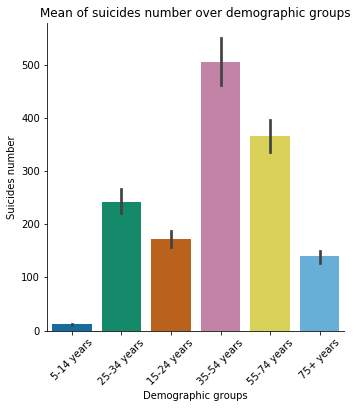

In [5]:
plt.figure(figsize=(15,15))
sns.catplot(data=suicide, x='age', y='suicides_no', kind='bar',order=['5-14 years', '25-34 years', '15-24 years', '35-54 years','55-74 years', '75+ years'])
plt.title("Mean of suicides number over demographic groups")
plt.ylabel("Suicides number")
plt.xlabel("Demographic groups")
plt.xticks(rotation=45)
plt.show()

We can see that, on average, individuals between 35-54 years have the highest suicide numbers followed directly by persons aged between 55-74 years. However, this behavior is not common for all countries. In order to highlight the difference between countries, we plot in the following figures the average of the suicides number for each demographic group for the select countries : United States, Albania, Republic of Korea and France.

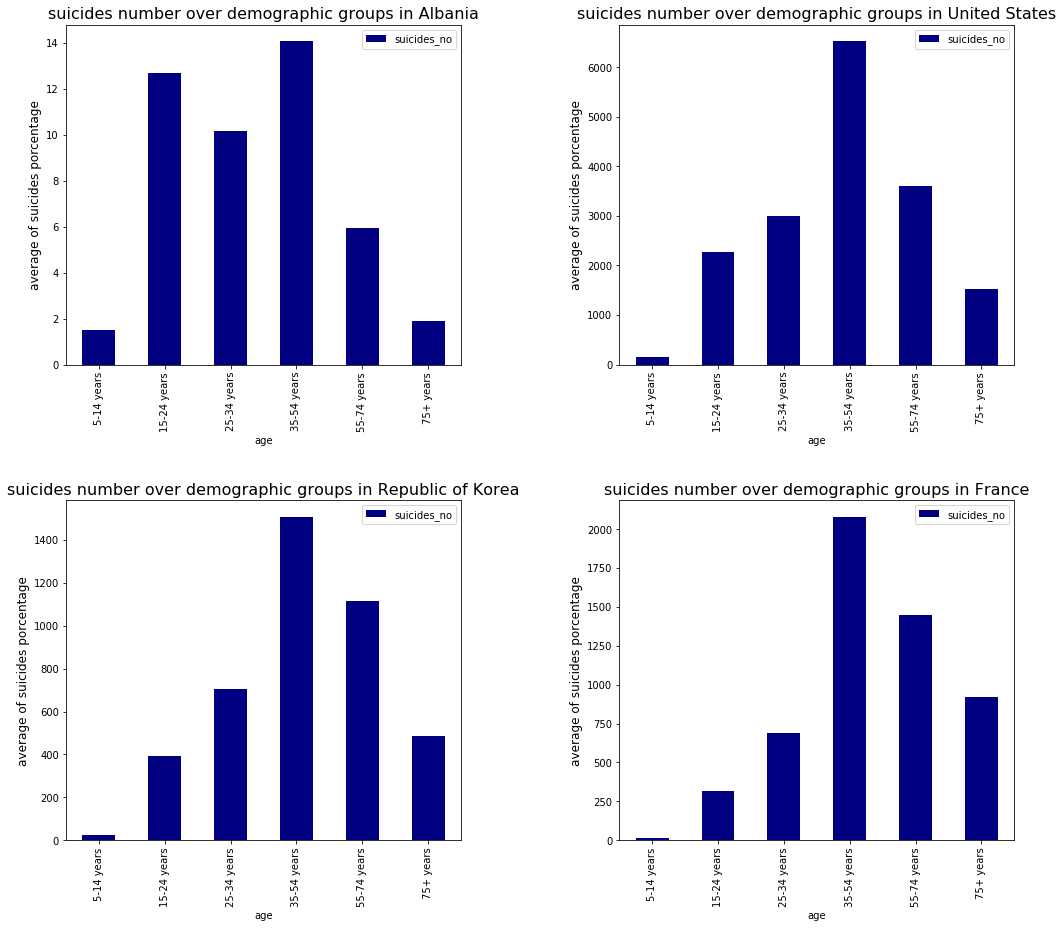

In [6]:
fig = plt.figure(figsize=(17, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, column in enumerate(['Albania','United States','Republic of Korea','France']):
    ax = fig.add_subplot(2, 2, i+1)
    suicide.loc[suicide["country"]==column,["suicides_no","age"]].groupby(["age"])[['suicides_no']].mean().reindex(['5-14 years',  '15-24 years','25-34 years', '35-54 years','55-74 years', '75+ years']).plot(ax=ax,kind='bar',colormap='jet')
    ax.set_title("suicides number over demographic groups in "+column, fontsize=16)
    ax.set_ylabel("average of suicides porcentage", fontsize=12)
    

**2--Suicides as a function of Sex** 

<Figure size 1080x1080 with 0 Axes>

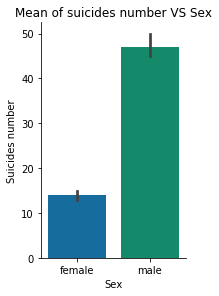

In [7]:
plt.figure(figsize=(15,15))
ax = sns.catplot(x="sex", y="suicides_no", data=suicide, estimator=np.median,height=4, aspect=.7,kind='bar')
plt.title("Mean of suicides number VS Sex")
plt.ylabel("Suicides number")
plt.xlabel("Sex")
plt.show()

It is notable from this figure that, on average, the suicide numbers for males are much higher than those for females. The following figure demonstrates that this statement is indeed true for all the demographic groups.

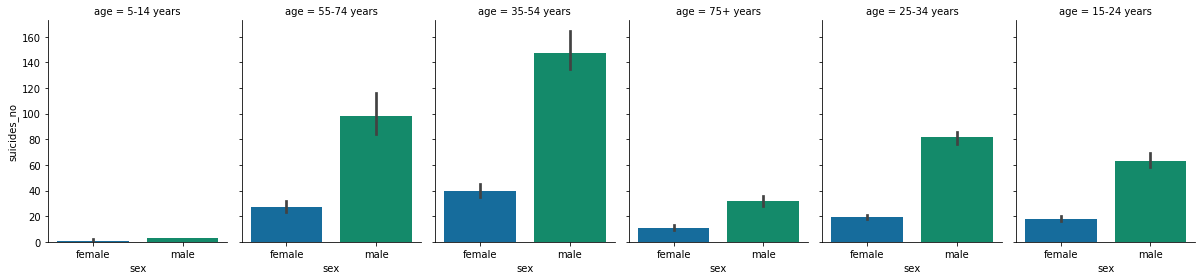

In [8]:
ax = sns.catplot(x="sex", y="suicides_no",col='age', data=suicide, estimator=np.median,height=4, aspect=.7,kind='bar')

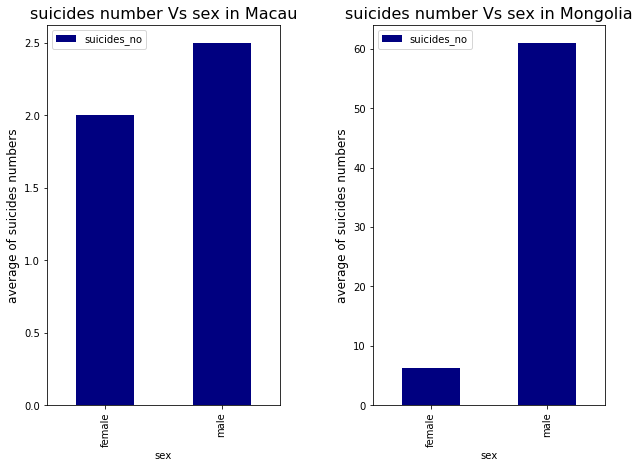

In [9]:
fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, column in enumerate([ 'Macau', 'Mongolia']):
    ax = fig.add_subplot(1, 2, i+1)
    suicide.loc[(suicide["country"]==column),["suicides_no","sex"]].groupby(["sex"])[['suicides_no']].mean().reindex(['female','male']).plot(ax=ax,kind='bar',colormap='jet')
    ax.set_title("suicides number Vs sex in "+column, fontsize=16)
    ax.set_ylabel("average of suicides numbers", fontsize=12)
    

In [10]:
suicide['country'].unique()

array(['Hungary', 'Slovenia', 'Jamaica', 'Thailand', 'Colombia',
       'Bosnia and Herzegovina', 'Switzerland', 'Seychelles', 'Belgium',
       'Kuwait', 'Serbia', 'Qatar', 'Portugal',
       'Saint Vincent and Grenadines', 'Greece', 'Luxembourg',
       'South Africa', 'Uzbekistan', 'Oman', 'Czech Republic', 'Aruba',
       'Saint Lucia', 'Romania', 'Saint Kitts and Nevis', 'Armenia',
       'Suriname', 'Ukraine', 'New Zealand', 'Albania', 'Uruguay', 'Fiji',
       'Georgia', 'Italy', 'Puerto Rico', 'Russian Federation',
       'United States', 'Chile', 'Latvia', 'Netherlands', 'Kazakhstan',
       'Japan', 'Israel', 'Belarus', 'Grenada', 'San Marino',
       'Montenegro', 'Malta', 'Australia', 'Bahamas', 'Paraguay',
       'Turkmenistan', 'Barbados', 'Mauritius', 'Brazil', 'Azerbaijan',
       'Guyana', 'Cuba', 'Estonia', 'Iceland', 'Canada', 'Germany',
       'Sri Lanka', 'El Salvador', 'Spain', 'Norway', 'Mexico',
       'Bulgaria', 'Trinidad and Tobago', 'Guatemala', 'Turkey',
  

**3- Evolution of the suicides number over the years** 

Text(0.5, 1, 'Evolution of the Number of suicides in the world (mean over countries)')

<Figure size 1080x1080 with 0 Axes>

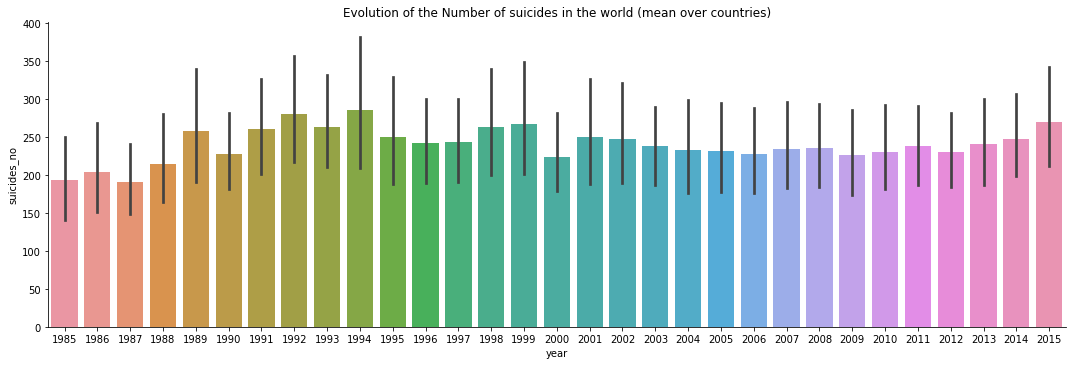

In [11]:
plt.figure(figsize=(15,15))
sns.catplot(data=suicide[suicide['year']<2016], x='year', y='suicides_no',kind='bar',height=5,aspect=3)
plt.title("Evolution of the Number of suicides in the world (mean over countries)")

Text(0.5, 1, 'Evolution of the Number of suicides in the U.S.')

<Figure size 1080x1080 with 0 Axes>

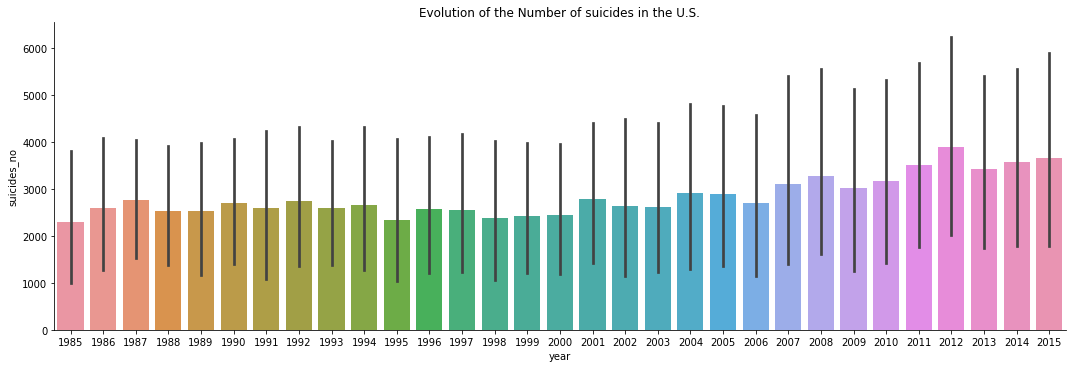

In [12]:
plt.figure(figsize=(15,15))
chart=sns.catplot(data=suicide[suicide['country']=='United States'], x='year', y='suicides_no',kind='bar',height=5,aspect=3)
plt.title("Evolution of the Number of suicides in the U.S.")

Text(0.5, 1, 'Evolution of the Number of suicides in Denmark')

<Figure size 1080x1080 with 0 Axes>

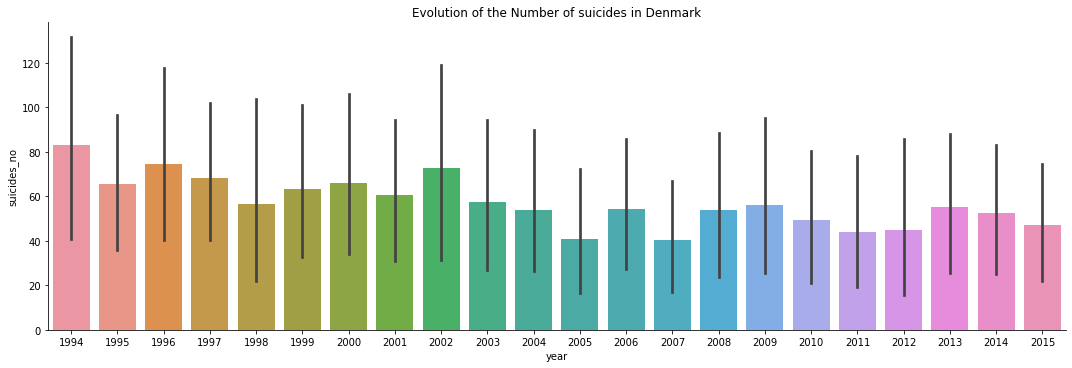

In [13]:
plt.figure(figsize=(15,15))
chart=sns.catplot(data=suicide[suicide['country']=='Denmark'], x='year', y='suicides_no',kind='bar',height=5,aspect=3)
plt.title("Evolution of the Number of suicides in Denmark")

Text(0.5, 1, 'Evolution of the Number of suicides in South Africa')

<Figure size 1080x1080 with 0 Axes>

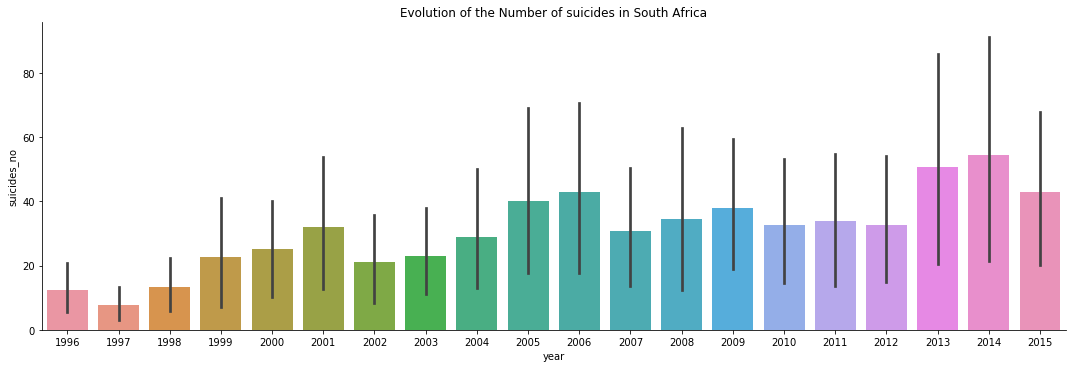

In [14]:
plt.figure(figsize=(15,15))
chart=sns.catplot(data=suicide[suicide['country']=='South Africa'], x='year', y='suicides_no',kind='bar',height=5,aspect=3)
plt.title("Evolution of the Number of suicides in South Africa")

We can conclude from the first figure that, in average, the number of suicides is almost steady from 1985 to 2016 which is also the case in the United States. We can also make the remark that this number is decreasing in the case of some countries like Denmark and increasing in other countries such as South Africa.

Text(0.5, 0, 'Suicides number')

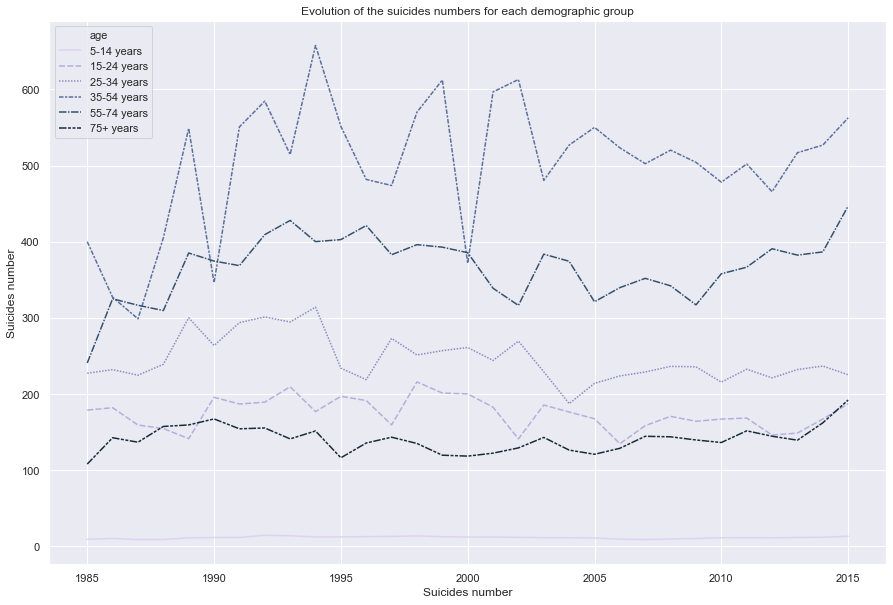

In [17]:
df = suicide[suicide['year']<2016].groupby(['year','age']).suicides_no.mean().reset_index()
df['age'] = df.age.astype(pd.api.types.CategoricalDtype(categories = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']))
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot('year','suicides_no',hue='age',style='age',data=df,hue_norm=LogNorm(),palette="ch:2.5,.25",sort=False)
plt.title("Evolution of the suicides numbers for each demographic group")
plt.ylabel("Suicides number")
plt.xlabel("Suicides number")

**4-Suicides VS generations**

<Figure size 1080x1080 with 0 Axes>

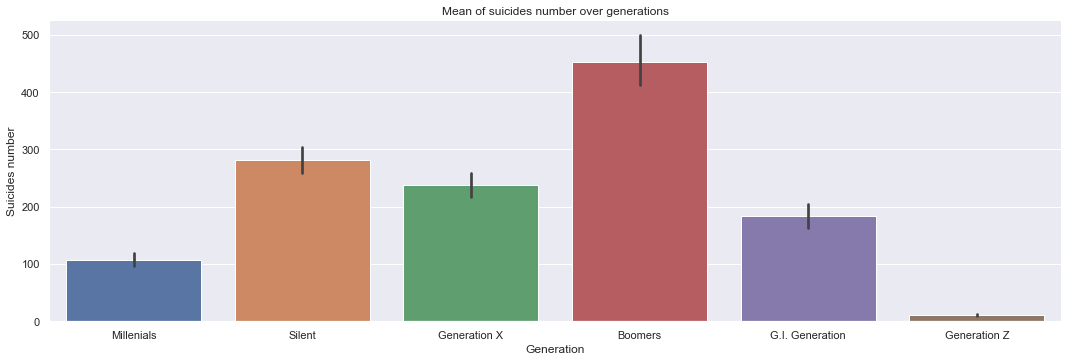

In [18]:
plt.figure(figsize=(15,15))
sns.catplot(data=suicide[suicide['year']<2016], x='generation', y='suicides_no',kind='bar',height=5,aspect=3)
plt.title("Mean of suicides number over generations")
plt.ylabel("Suicides number")
plt.xlabel("Generation")
plt.show()

**5-Suicides VS countries and socio-economic indicators**

In this section we try to study the effect of the socio-economic indicators on the suicides. First let us try to visualise the mean of suicides number for each continent.

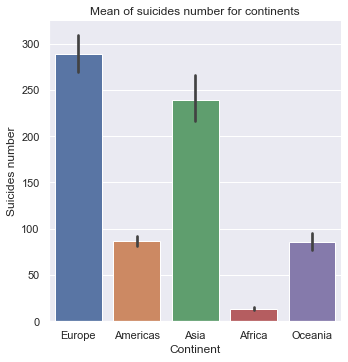

In [19]:
sns.catplot(data=suicide, x='continent', y='suicides_no', kind='bar')
plt.title("Mean of suicides number for continents")
plt.ylabel("Suicides number")
plt.xlabel("Continent")
plt.show()

We can see from this figure that Europe presents the bigger suicide mean over the years but this phenomenon may be biased by the total population of each continent. To get rid of this effect, we plot in the following figure the average of the percentage of suicides in each continent. 

Note : We calculate the pourcentage of suicides of each demographic graphic with reference to the population of this group and not to the total population of each countries. 

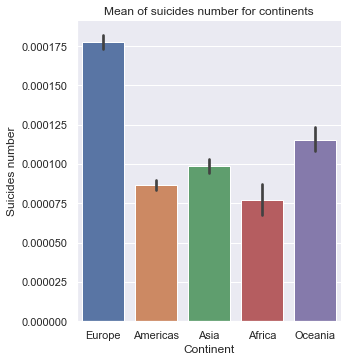

In [20]:
suicide_local=suicide
suicide_local['normalized_no']=suicide['suicides_no']/suicide['population']
sns.catplot(data=suicide_local, x='continent', y='normalized_no', kind='bar')
plt.title("Mean of suicides number for continents")
plt.ylabel("Suicides number")
plt.xlabel("Continent")
plt.show()

What are the countries having the largest suicides numbers \?

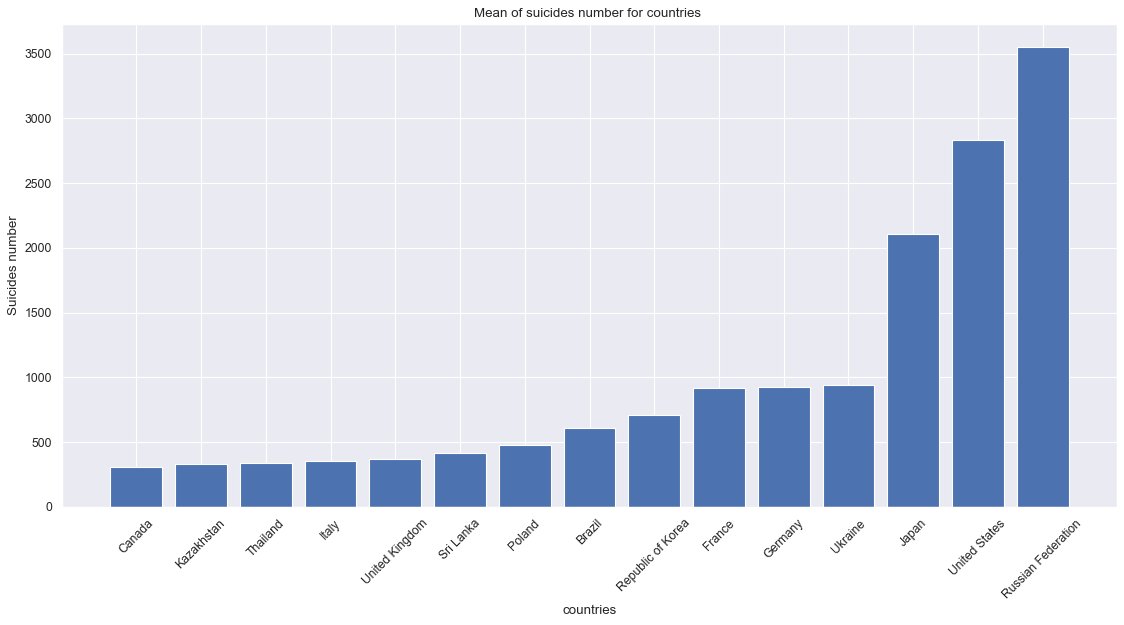

In [21]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(17, 8), dpi=80, facecolor='w', edgecolor='k')
suicide_loc=suicide.groupby(by=['country'])['suicides_no'].mean().reset_index().sort_values(['suicides_no'],ascending=True).tail(15)
plt.bar(suicide_loc['country'],suicide_loc['suicides_no'])
plt.title("Mean of suicides number for countries ")
plt.ylabel("Suicides number")
plt.xlabel("countries")
plt.xticks(rotation=45)
plt.show()

Does the Population has a huge effect on this phenomenon \? In other words if we divide the number of suicides of each demographic group of countries by the population of this demographic group, will we obtain the same result \?

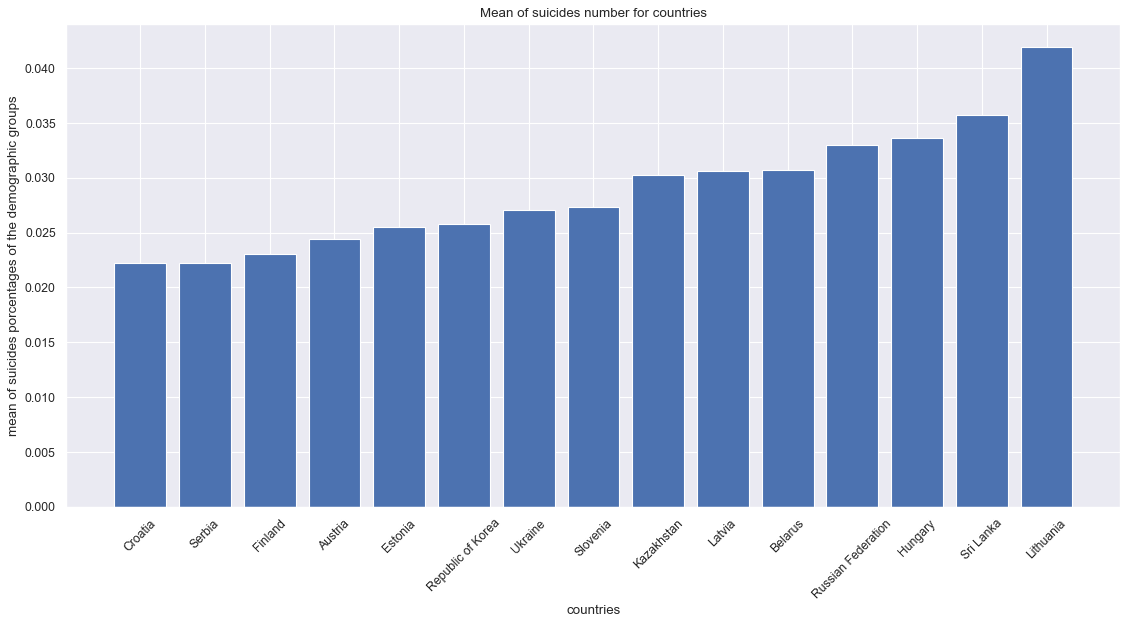

In [22]:
suicide_local=suicide
suicide_local['normalized_no']=suicide['suicides_no']/suicide['population']
from matplotlib.pyplot import figure
figure(num=None, figsize=(17, 8), dpi=80, facecolor='w', edgecolor='k')
suicide_loc=suicide_local.groupby(by=['country'])['normalized_no'].mean().reset_index().sort_values(['normalized_no'],ascending=True).tail(15)
plt.bar(suicide_loc['country'],suicide_loc['normalized_no']*100)
plt.title("Mean of suicides number for countries")
plt.ylabel("mean of suicides porcentages of the demographic groups")
plt.xlabel("countries")
plt.xticks(rotation=45)
plt.show()

The answer is yes!  In fact, for example United states has the second largest mean number of suicides numbers but it is not a part of the 15 countries having the largest suicide pourcentages. 

***Effect of some of the socio-economic indicators on the number of suicides***

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

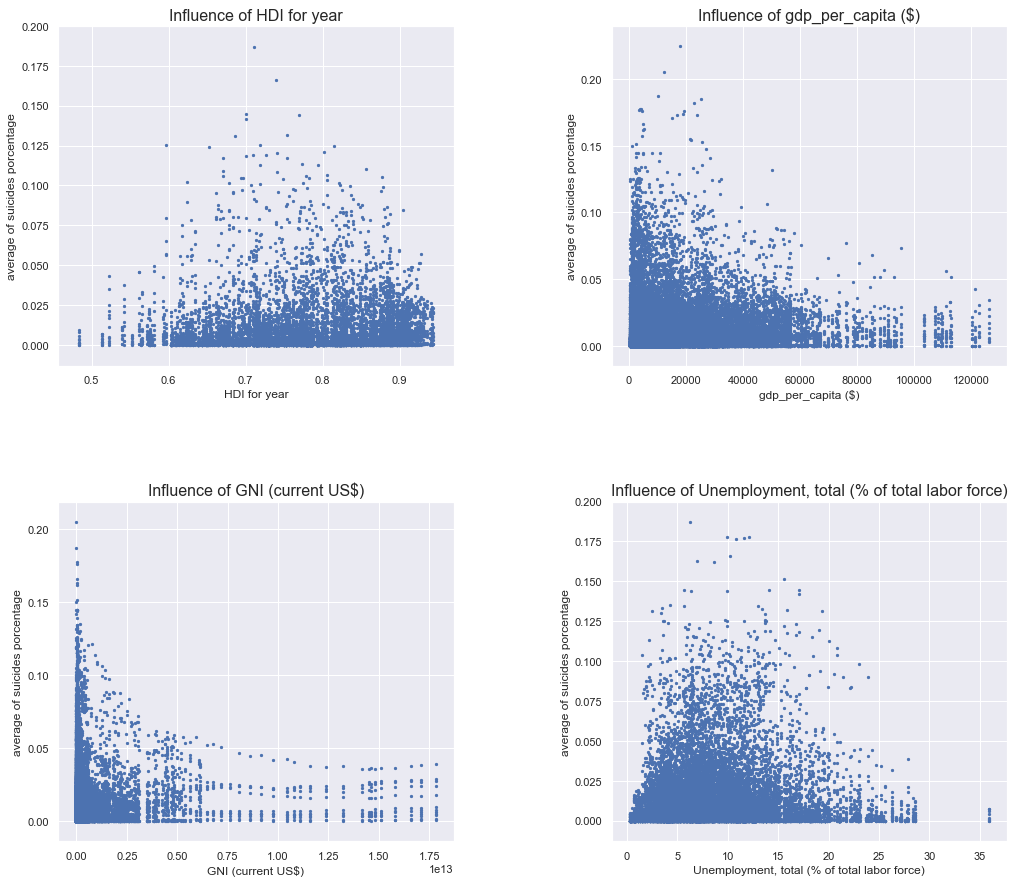

In [23]:
suicide_local=suicide
suicide_local['normalized_no']=suicide['suicides_no']*100/suicide['population']
fig = plt.figure(figsize=(17, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, column in enumerate(['HDI for year', 'gdp_per_capita ($)', 'GNI (current US$)', 'Unemployment, total (% of total labor force)']):
    ax = fig.add_subplot(2, 2, i+1)
    suicide_local.plot.scatter(ax=ax, x=column, y='normalized_no', marker='.')
    ax.set_title("Influence of "+column, fontsize=16)
    ax.set_ylabel("average of suicides porcentage", fontsize=12)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

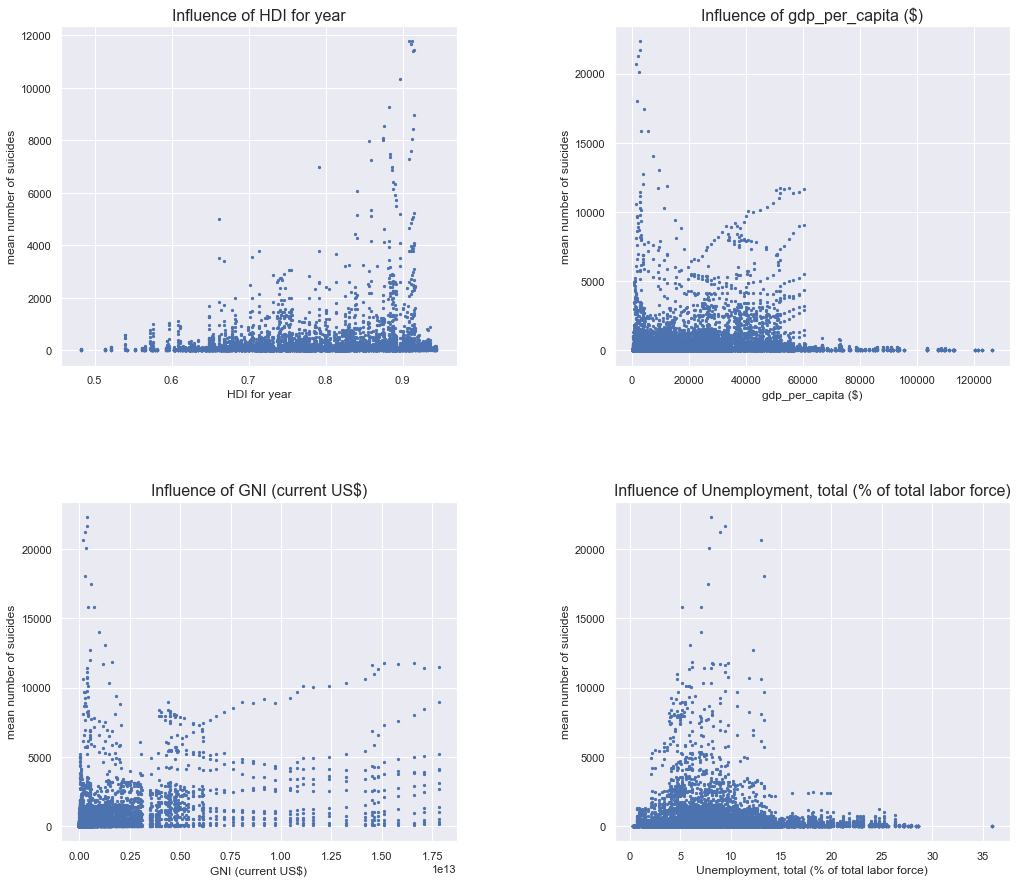

In [24]:
suicide_local=suicide
suicide_local['normalized_no']=suicide['suicides_no']*100/suicide['population']
fig = plt.figure(figsize=(17, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, column in enumerate(['HDI for year', 'gdp_per_capita ($)', 'GNI (current US$)', 'Unemployment, total (% of total labor force)']):
    ax = fig.add_subplot(2, 2, i+1)
    suicide.plot.scatter(ax=ax, x=column, y='suicides_no', marker='.')
    ax.set_title("Influence of "+column, fontsize=16)
    ax.set_ylabel("mean number of suicides", fontsize=12)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

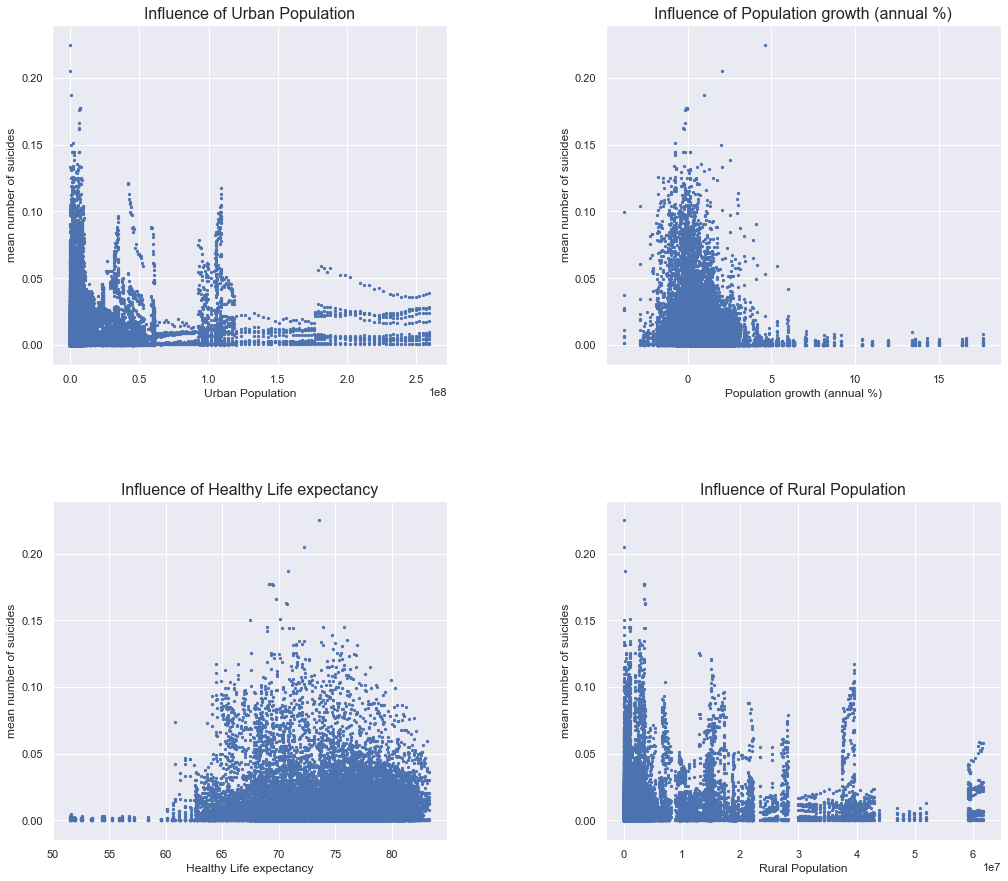

In [25]:
suicide_local=suicide
suicide_local['normalized_no']=suicide['suicides_no']*100/suicide['population']
fig = plt.figure(figsize=(17, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, column in enumerate([ 'Urban Population', 'Population growth (annual %)',
       'Healthy Life expectancy',  'Rural Population']):
    ax = fig.add_subplot(2, 2, i+1)
    suicide_local.plot.scatter(ax=ax, x=column, y='normalized_no', marker='.')
    ax.set_title("Influence of "+column, fontsize=16)
    ax.set_ylabel("mean number of suicides", fontsize=12)

What about the indicators representig the life satisfaction of individuals \?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


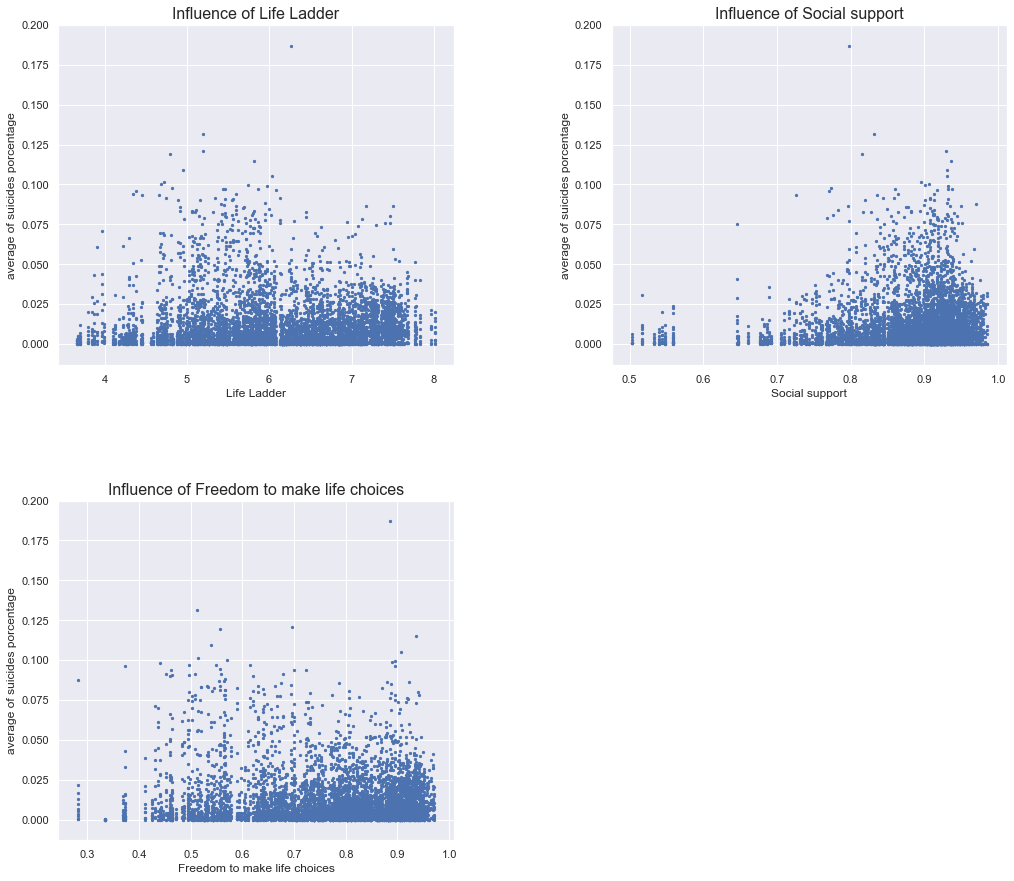

In [26]:
suicide_local['normalized_no']=suicide['suicides_no']*100/suicide['population']
fig = plt.figure(figsize=(17, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, column in enumerate(['Life Ladder','Social support', 'Freedom to make life choices']):
    ax = fig.add_subplot(2, 2, i+1)
    suicide_local.plot.scatter(ax=ax, x=column, y='normalized_no', marker='.')
    ax.set_title("Influence of "+column, fontsize=16)
    ax.set_ylabel("average of suicides porcentage", fontsize=12)

Child labour has a huge effect on the number of suicides of children between 5 and 14 years. The following plot shows the average of the children's number of suicides in countries having child labour and the others.


<Figure size 1080x1080 with 0 Axes>

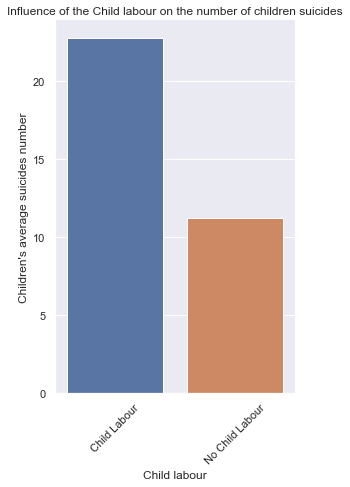

In [27]:
plt.figure(figsize=(15,15))
suicide_loc=suicide
suicide_loc.loc[suicide["Child Labour"].isna(),"Child labour"]="No Child Labour"
suicide_loc.loc[suicide["Child Labour"].isna()==False,"Child labour"]="Child Labour"
suicide_loc=suicide_loc[suicide_loc["age"]=="5-14 years"].groupby(by=['Child labour'], as_index=False)[['suicides_no']].mean()
ax = sns.catplot(x="Child labour", y="suicides_no", data=suicide_loc, estimator=np.median,height=6, aspect=.7,kind='bar')
plt.ylabel("Children's average suicides number")
plt.xticks(rotation=45)
plt.title("Influence of the Child labour on the number of children suicides")
plt.show()

## 3- Workflow
The task in this challenge is to predict suicide rates for a given year, country, gender and generation along with indicators such as HDI (Human Development Index) and GDP (Gross Domestic Product) as accurately as possible. This is a regression task, with the constraint that the predictions must be integers.

For submitting at the RAMP site, we will use two classes, saved in two different files:

- a class FeatureExtractor, which will be used to extract features from the dataset for the regression task
- a class Regressor to predict the outputs 

![Workflow](https://drive.google.com/uc?id=1Z-_db0rbPcfbK2fhuNzN6vJrUlKJC4qo)


## 3-1 Feature Extractor

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OrdinalEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
import category_encoders as ce
import pandas as pd
import numpy as np


class FeatureExtractor(object):
    def __init__(self):
        pass

    def fit(self, X_df, y_array):
        pass

    def transform(self, X_df):
        X_new = X_df.copy()
        numeric_cols = [c for c in X_new if X_new[c].dtype.kind in ('i', 'f') ]
        drop_cols = ['country-year','continent']
        ct = ColumnTransformer(transformers=[('numeric', numeric_transformer, numeric_cols),
          ('countries',ce.one_hot.OrdinalEncoder(),['country']),
          ('binary', OrdinalEncoder(), ['sex','age','generation']),                                 
          ('gdpforyear', make_pipeline(gdp_year_transformer, SimpleImputer(strategy='median')),['GDP_for_year']),
          ('drop cols', 'drop', drop_cols),
         ])

        XX = ct.fit_transform(X_new)
        return XX
        


numeric_transformer = Pipeline(steps=[('impute', SimpleImputer(strategy='median'))])

def process_gdp_for_year(X):
    gdp = X['GDP_for_year'].str[:-12]
    return pd.to_numeric(gdp, errors='coerce').values[:, np.newaxis]

gdp_year_transformer = FunctionTransformer(process_gdp_for_year, validate=False)
 


## 3-2 Baseline Regressor

In [0]:
from sklearn import linear_model
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

class Regressor(BaseEstimator):
    def __init__(self):
        self.rgr = make_pipeline(StandardScaler(),RandomForestRegressor(n_estimators=20,max_depth=30))
        
    def fit(self, X, y):
        self.rgr.fit(X, y.reshape(len(y),1))

    def predict(self, X):
        y_pred =  self.rgr.predict(X)
        return y_pred.reshape(len(y_pred),1)


## 4- Local testing before submission

It is important that you test your submission files before submitting them. For this we provide a unit test. Note that the test runs on your files in submissions/starting_kit, not on the classes defined in the cells of this notebook.

Start install the **ramp-workflow** packages unsing "pip install" or directly from the GitHub repository.

    pip install ramp-workflow

Then you can run

    ramp_test_submission --submission starting_kit

If it runs and print training and test errors on each fold, then you can submit the code.

In [31]:
!ramp_test_submission --submission starting_kit

Testing Prediction of Suicide Numbers
Reading train and test files from ./data ...
Reading cv ...
Training submissions\starting_kit ...
CV fold 0
	score  suicide error      time
	train           0.45  5.249948
	valid           0.61  0.269863
	test            3.65  0.069818
CV fold 1
	score  suicide error      time
	train           0.43  7.247892
	valid           0.89  0.407388
	test            2.95  0.060004
CV fold 2
	score  suicide error      time
	train           0.34  7.454887
	valid           0.59  0.280376
	test            2.51  0.049654
CV fold 3
	score  suicide error      time
	train           0.47  6.904732
	valid           1.09  0.390420
	test            3.70  0.049786
CV fold 4
	score  suicide error      time
	train           0.43  6.794903
	valid           1.79  0.300120
	test            2.51  0.049640
CV fold 5
	score  suicide error      time
	train           0.57  6.650208
	valid           0.76  0.319922
	test            2.93  0.044747
CV fold 6
	score  suicide error     

c:\programdata\anaconda3\lib\site-packages\sklearn\pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
c:\programdata\anaconda3\lib\site-packages\sklearn\pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
c:\programdata\anaconda3\lib\site-packages\sklearn\pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
c:\programdata\anaconda3\lib\site-packages\sklearn\pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n